# Staircase Ascent

Problem: how many ways are there to get to step n if you can take steps of size 1, 2, 3?

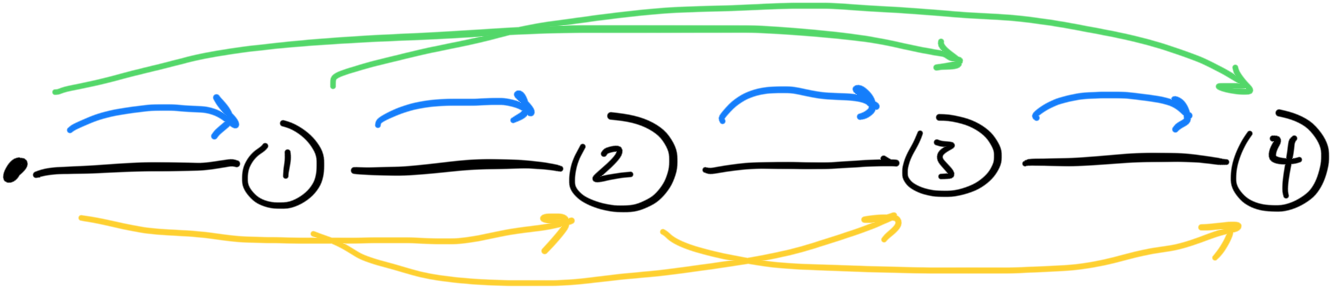

In [ ]:
def step(n):
    """Computes the number of ways to climb n steps if you can take 1, 2, or 3 steps at a time, recursively."""
    if n == 0:
        return 0
    if n == 1:
        return 1
    if n == 2:
        return 2
    if n == 3:
        return 4 
    return step(n-1) + step(n-2) + step(n-3)

In [ ]:
def fast_step(n):
    a, b, c = 1, 1, 2

    for _ in range(n):
        a, b, c = b, c, a+b+c

    return a

In [ ]:
from functools import cache

@cache
def memo_step(n):
    assert n >= 0
    if n <= 3:
        return (1, 1, 2, 4)[n]
    return memo_step(n-1) + memo_step(n-2) + memo_step(n-3)

In [ ]:
for i in range(1, 11):
    print(step(i), fast_step(i), memo_step(i))

In [ ]:
import timeit

n = 100

time_fast_step = timeit.timeit(lambda: fast_step(n), number=1000)

def wrapper():
    memo_step.cache_clear()
    return memo_step(n)

time_memo_step = timeit.timeit(wrapper, number=1000)

print(f"Time taken by fast_step({n}): {time_fast_step * 1000:.3f} milliseconds")
print(f"Time taken by memo_step({n}): {time_memo_step * 1000:.3f} milliseconds")